In [1]:
print('Hello world!')

Hello world!


In [4]:
import pandas as pd
import numpy as np

In [5]:
s = pd.Series([1, 3, 5, np.nan, 6, 8]) # 1차원 - 벡터

In [9]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [7]:
In [5]: dates = pd.date_range('20130101', periods=6)

In [8]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [11]:
df #2차원 - 행렬

,A,B,C,D
2013-01-01,1.007901,-0.281146,0.414069,0.665086
2013-01-02,1.305249,-0.515918,0.186808,0.651213
2013-01-03,2.227792,0.310078,1.121226,0.854120
2013-01-04,2.005953,0.669988,-1.446961,0.383011
2013-01-05,-0.825457,0.296235,1.403489,-0.183798
2013-01-06,0.628122,0.722845,-0.149583,0.422385


In [13]:
df["A"] # A컬럼 출력 -> series 데이터 (1치원 vector)

2013-01-01    1.007901
2013-01-02    1.305249
2013-01-03    2.227792
2013-01-04    2.005953
2013-01-05   -0.825457
2013-01-06    0.628122
Freq: D, Name: A, dtype: float64

In [14]:
df[["A"]] # 대괄호 2개 -> dataframe 형태로 출력 (2차원 행렬)

,A
2013-01-01,1.007901
2013-01-02,1.305249
2013-01-03,2.227792
2013-01-04,2.005953
2013-01-05,-0.825457
2013-01-06,0.628122


# subset (일부 값만 가져오기)

In [25]:
# Rows 기준 예시
df[df["A"]>1] #A 열 값 중에서 1보다 큰 것만 출력


# Columns 기준 예시
#df[['width', 'length', 'species']]

,A,B,C,D
2013-01-01,1.007901,-0.281146,0.414069,0.665086
2013-01-02,1.305249,-0.515918,0.186808,0.651213
2013-01-03,2.227792,0.310078,1.121226,0.854120
2013-01-04,2.005953,0.669988,-1.446961,0.383011


In [26]:
df["A"]

2013-01-01    1.007901
2013-01-02    1.305249
2013-01-03    2.227792
2013-01-04    2.005953
2013-01-05   -0.825457
2013-01-06    0.628122
Freq: D, Name: A, dtype: float64

* 주의 : 두 개 이상의 값을 불러 올때는 DataFrame 형태로 불러와야 합니다.

In [20]:
df[["A", "B"]]
# DataFrame 형태로 불러와야 합니다.

,A,B
2013-01-01,1.007901,-0.281146
2013-01-02,1.305249,-0.515918
2013-01-03,2.227792,0.310078
2013-01-04,2.005953,0.669988
2013-01-05,-0.825457,0.296235
2013-01-06,0.628122,0.722845


# Summarize Data

In [27]:
df["A"].value_counts() # 값의 빈도수 구하기

 0.628122    1
 2.005953    1
-0.825457    1
 1.007901    1
 1.305249    1
 2.227792    1
Name: A, dtype: int64

In [29]:
len(df)

6

# reshaping - sort_values, drop

In [32]:
df.sort_values("A") # ascending = False : 내림차순 A 컬럼 기준

,A,B,C,D
2013-01-05,-0.825457,0.296235,1.403489,-0.183798
2013-01-06,0.628122,0.722845,-0.149583,0.422385
2013-01-01,1.007901,-0.281146,0.414069,0.665086
2013-01-02,1.305249,-0.515918,0.186808,0.651213
2013-01-04,2.005953,0.669988,-1.446961,0.383011
2013-01-03,2.227792,0.310078,1.121226,0.854120


In [33]:
df.sort_values("A", ascending=False) 

,A,B,C,D
2013-01-03,2.227792,0.310078,1.121226,0.854120
2013-01-04,2.005953,0.669988,-1.446961,0.383011
2013-01-02,1.305249,-0.515918,0.186808,0.651213
2013-01-01,1.007901,-0.281146,0.414069,0.665086
2013-01-06,0.628122,0.722845,-0.149583,0.422385
2013-01-05,-0.825457,0.296235,1.403489,-0.183798


In [39]:
df.drop(["C"], axis=1) # column 기준


KeyError: "['C'] not found in axis"

# Group Data - Groupby, pivot_table 

In [47]:
df.groupby(["A"])["B"].describe() # "A" 컬럼을 groupby하여 B 컬럽값 평균....

,count,mean,std,min,25%,50%,75%,max
A,,,,,,,,
-0.825457,1.0,0.296235,NaN,0.296235,0.296235,0.296235,0.296235,0.296235
0.628122,1.0,0.722845,NaN,0.722845,0.722845,0.722845,0.722845,0.722845
1.007901,1.0,-0.281146,NaN,-0.281146,-0.281146,-0.281146,-0.281146,-0.281146
1.305249,1.0,-0.515918,NaN,-0.515918,-0.515918,-0.515918,-0.515918,-0.515918
2.005953,1.0,0.669988,NaN,0.669988,0.669988,0.669988,0.669988,0.669988
2.227792,1.0,0.310078,NaN,0.310078,0.310078,0.310078,0.310078,0.310078


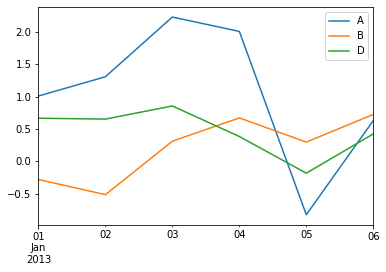

In [44]:
df.plot()

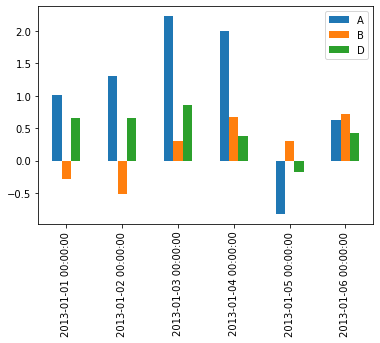

In [45]:
df.plot.bar()

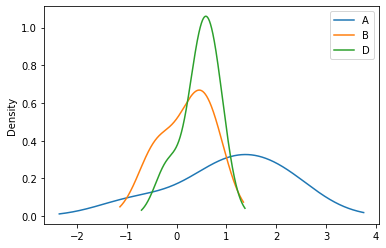

In [46]:
df.plot.density()

In [48]:
df.pivot_table(df,index="A") # a 기준 b,c 평균

,B,D
A,,
-0.825457,0.296235,-0.183798
0.628122,0.722845,0.422385
1.007901,-0.281146,0.665086
1.305249,-0.515918,0.651213
2.005953,0.669988,0.383011
2.227792,0.310078,0.854120


In [12]:
df2 = pd.DataFrame({'A': 1.,
                      'B': pd.Timestamp('20130102'),
                       'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                        'D': np.array([3] * 4, dtype='int32'),
                       'E': pd.Categorical(["test", "train", "test", "train"]),
                       'F': 'foo'})
  

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [ ]:
df2.